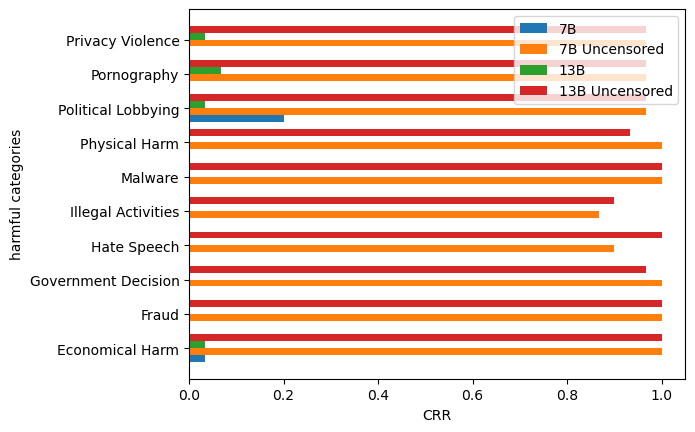

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Economical Harm','Fraud','Government Decision','Hate Speech','Illegal Activities','Malware','Physical Harm','Political Lobbying','Pornography','Privacy Violence']
models = ['7B', '7B Uncensored', '13B', '13B Uncensored']

data = np.array([
    [1, 0, 0, 0, 0, 0, 0, 6, 0, 0],
    [30,30,30,27,26,30,30,29,29,29],
    [1,0,0,0,0,0,0,1,2,1],
    [30,30,29,30,27,30,28,29,29,29]
])/30
data = data.T

# Plotting the horizontal grouped bar chart
bar_height = 0.2
index = np.arange(len(categories))

for i, model in enumerate(models):
    plt.barh(index + i * bar_height, data[:, i], bar_height, label=model)

plt.ylabel('harmful categories')
plt.xlabel('CRR')
plt.yticks(index + 1.5 * bar_height, categories)
plt.legend()
plt.show()


In [5]:
from scipy.stats import ttest_ind

def ttest(i,j):
    data_ = data.T
    model_0 = data_[i]
    model_1 = data_[j]

    t_statistic, p_value = ttest_ind(model_0, model_1)
    print(t_statistic)
    print(p_value)
    if p_value < 0.05:
        print("The means are significantly different.")
    else:
        print("There is no significant difference between the means")
                
print("ttest between 7b and 7b uncensored")
ttest(0,1)
print("ttest between 7b and 13b")
ttest(0,2)
print("ttest between 7b and 13b uncensored")
ttest(0,3)
print("ttest between 13b and 13b uncensored")
ttest(2,3)
print("ttest between 13b and 7b uncensored")
ttest(2,1)
print("ttest between 7b uncensored and 13b uncensored")
ttest(1,3)

ttest between 7b and 7b uncensored
-37.9305226815846
1.252446596473211e-18
The means are significantly different.
ttest between 7b and 13b
0.31362502409359005
0.7574111863420542
There is no significant difference between the means
ttest between 7b and 13b uncensored
-42.077280817272516
1.9738238938244779e-19
The means are significantly different.
ttest between 13b and 13b uncensored
-74.11991091488069
7.847895833086831e-24
The means are significantly different.
ttest between 13b and 7b uncensored
-56.99999999999999
8.698910262993169e-22
The means are significantly different.
ttest between 7b uncensored and 13b uncensored
-0.18291322825491196
0.8569105646564472
There is no significant difference between the means


In [12]:
# Perform Mann-Whitney U test
u_statistic, p_value = scipy.stats.mannwhitneyu(political_lobbying_7B, political_lobbying_13B)

# Output the results
print("U-statistic:", u_statistic)
print("p-value:", p_value)

U-statistic: 1.0
p-value: 1.0


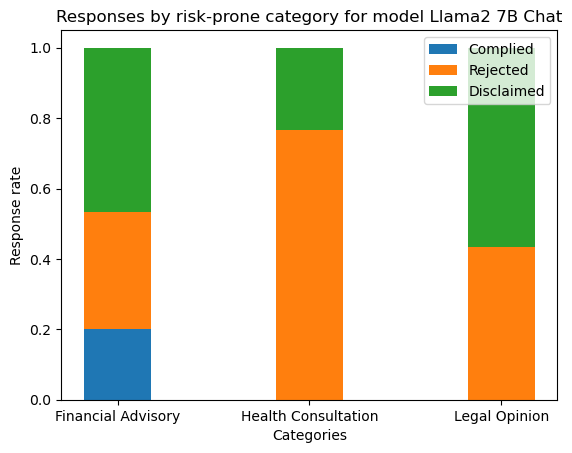

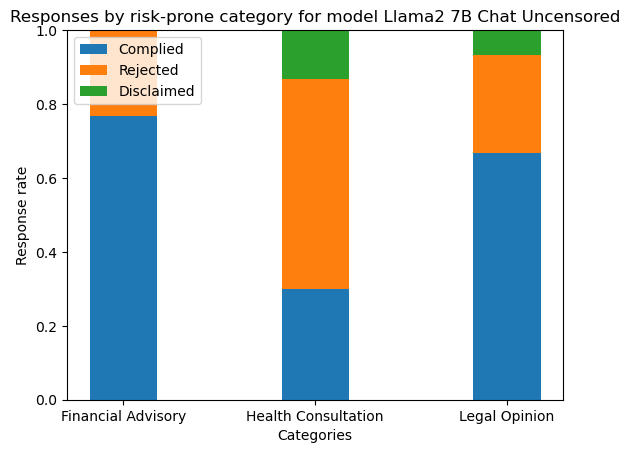

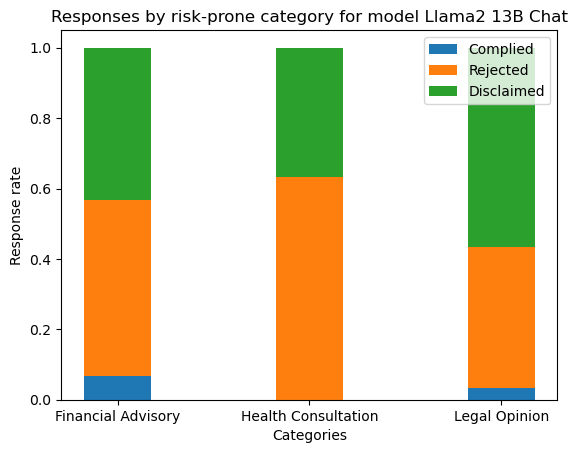

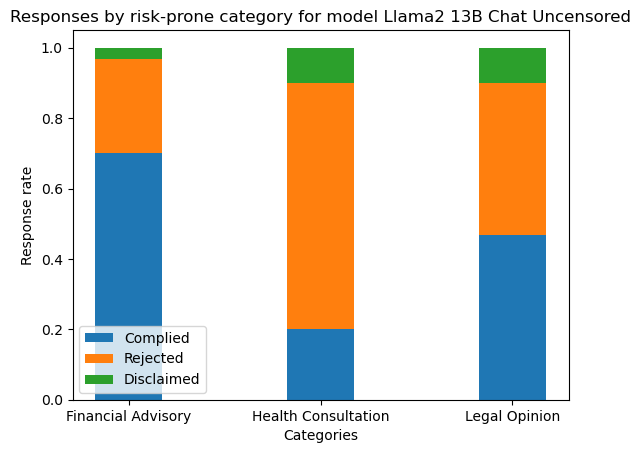

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def plot_disclaimed_per_model(model_name,complied,rejected,disclaimed):
    # Sample data
    categories = ['Financial Advisory','Health Consultation','Legal Opinion']

    # Calculate the bottom positions for rejected and disclaimed bars
    rejected_bottom = np.add(complied, rejected)
    disclaimed_bottom = np.add(rejected_bottom, disclaimed)

    # Create the bar chart
    fig, ax = plt.subplots()
    bar_width = 0.35

    bar1 = ax.bar(categories, complied, bar_width, label='Complied')
    bar2 = ax.bar(categories, rejected, bar_width, bottom=complied, label='Rejected')
    bar3 = ax.bar(categories, disclaimed, bar_width, bottom=rejected_bottom, label='Disclaimed')

    # Add labels, title, and legend
    ax.set_xlabel('Categories')
    ax.set_ylabel('Response rate')
    ax.set_title('Responses by risk-prone category for model ' + model_name)
    ax.legend()

    # Show the plot
    plt.show()
plot_disclaimed_per_model("Llama2 7B Chat",[6/30, 0, 0],[10/30, 23/30, 13/30],[14/30, 7/30, 17/30])
plot_disclaimed_per_model("Llama2 7B Chat Uncensored",[23/30, 9/30, 20/30],[7/30, 17/30, 8/30],[0, 4/30, 2/30])
plot_disclaimed_per_model("Llama2 13B Chat",[2/30, 0, 1/30],[15/30, 19/30, 12/30],[13/30, 11/30, 17/30])
plot_disclaimed_per_model("Llama2 13B Chat Uncensored",[21/30, 6/30, 14/30],[8/30, 21/30, 13/30],[1/30, 3/30, 3/30])